<a href="https://colab.research.google.com/github/Bhimsendabby/Machine--Learning-practice/blob/main/Autocoder_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder with MNIST Dataset

This document provides a step-by-step guide to building an autoencoder using the MNIST dataset. The autoencoder is a type of neural network that learns to compress (encode) the data and then reconstruct (decode) it back to the original form.

## Table of Contents

1. [Introduction](#introduction)
2. [Setup & Importing Modules](#setup)
3. [Loading Dataset & Data Preprocessing](#data-preprocessing)
4. [Building the Autoencoder](#building-the-autoencoder)
5. [Training the Autoencoder](#training-the-autoencoder)
6. [Evaluating the Autoencoder](#evaluating-the-autoencoder)
7. [Conclusion](#conclusion)

## Introduction

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). The goal of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction.

## Setup

First, ensure you have the necessary libraries installed. You can install them using pip if you haven't already.

```bash
pip install tensorflow keras numpy matplotlib


Ref:- https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/?ref=lbp

# Setup & Importing Modules

In [ ]:
#Importing all the required libraries
import torch
import torch.utils.data
from torch.utils.data import DataLoader,dataset
import torchvision
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import sampler
import matplotlib.colors as mcolors

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
device

device(type='cuda')

# Hyperparameters

In [3]:
#Batch size for iterating images in batching
RANDOM_SEED = 49
LEARNING_RATE = 0.0005
BATCH_SIZE = 256
NUM_EPOCHS = 30
NUM_CLASSES = 10

# Loading Dataset & Data Preprocessing

In [7]:
# Downloading MNIST Dataset and saving in the root directory
# Using Transform for converting images into torch tensors
train_dataset = datasets.MNIST(root='/content/mnist',train=True,transform=transforms.ToTensor(),download=True)
valid_dataset = datasets.MNIST(root='/content/mnist',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = datasets.MNIST(root='/content/mnist',train=False,transform=transforms.ToTensor(),download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6046436.02it/s]


Extracting /content/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /content/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159118.99it/s]


Extracting /content/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1507950.31it/s]


Extracting /content/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10818017.47it/s]

Extracting /content/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mnist/MNIST/raw



In [8]:
# Initialing DataLoader for loading dataset in batches
# 100 images, batch size =10 then dataloader with iterate 100 images by 10 by 10
num_workers = 2
train_loader = DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE,num_workers=num_workers,shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset,batch_size=BATCH_SIZE,num_workers=num_workers,shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=BATCH_SIZE,num_workers=num_workers,shuffle=True)

In [10]:
# Checking the dataset
print('Training Set:\n')
for images, labels in train_loader:
    print('Image batch dimensions:', images.size())
    print('Image label dimensions:', labels.size())
    print(labels[:10])
    break

Training Set:

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
tensor([4, 7, 6, 5, 2, 4, 0, 9, 4, 8])


In [7]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,36),
        nn.ReLU(),
        nn.Linear(36,18),
        nn.ReLU(),
        nn.Linear(18,9)
    )

    self.decoder = nn.Sequential(
        nn.Linear(9,18),
        nn.ReLU(),
        nn.Linear(18,36),
        nn.ReLU(),
        nn.Linear(36,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid()
    )


  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [8]:
model = Autoencoder().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate,
                             weight_decay = 1e-8)

In [9]:
n_total_steps = len(train_loader)
n_total_steps

1875

Epoch [1/50], Loss: 0.0680
Epoch [2/50], Loss: 0.0642
Epoch [3/50], Loss: 0.0700
Epoch [4/50], Loss: 0.0695
Epoch [5/50], Loss: 0.0710
Epoch [6/50], Loss: 0.0663
Epoch [7/50], Loss: 0.0627
Epoch [8/50], Loss: 0.0628
Epoch [9/50], Loss: 0.0696
Epoch [10/50], Loss: 0.0703
Epoch [11/50], Loss: 0.0645
Epoch [12/50], Loss: 0.0707
Epoch [13/50], Loss: 0.0671
Epoch [14/50], Loss: 0.0689
Epoch [15/50], Loss: 0.0661
Epoch [16/50], Loss: 0.0701
Epoch [17/50], Loss: 0.0731
Epoch [18/50], Loss: 0.0598
Epoch [19/50], Loss: 0.0710
Epoch [20/50], Loss: 0.0624
Epoch [21/50], Loss: 0.0682
Epoch [22/50], Loss: 0.0669
Epoch [23/50], Loss: 0.0680
Epoch [24/50], Loss: 0.0677
Epoch [25/50], Loss: 0.0639
Epoch [26/50], Loss: 0.0696
Epoch [27/50], Loss: 0.0640
Epoch [28/50], Loss: 0.0645
Epoch [29/50], Loss: 0.0623
Epoch [30/50], Loss: 0.0642
Epoch [31/50], Loss: 0.0669
Epoch [32/50], Loss: 0.0665
Epoch [33/50], Loss: 0.0698
Epoch [34/50], Loss: 0.0661
Epoch [35/50], Loss: 0.0645
Epoch [36/50], Loss: 0.0758
E

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

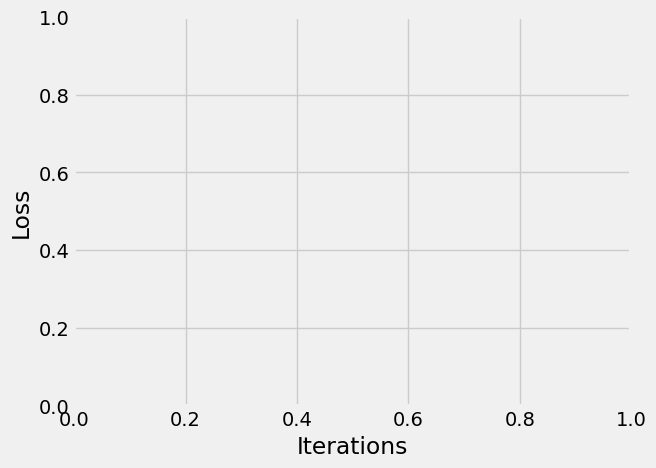

In [18]:
outputs = []
losses = []
for epoch in range(epochs):
  for (image, _) in train_loader:
    image = image.reshape(-1,28*28)
    image = image.to(device)
    reconstruct = model(image)

    loss = criterion(reconstruct,image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss)

  print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

  outputs.append((epochs, image, reconstruct))



# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

In [1]:
with torch.no_grad():
  for i, item in enumerate(image):
      # Reshape the array for plotting
      item = item.reshape(-1, 28, 28)
      item = item.cpu()
      plt.imshow(item[0])
      plt.show()

NameError: name 'torch' is not defined

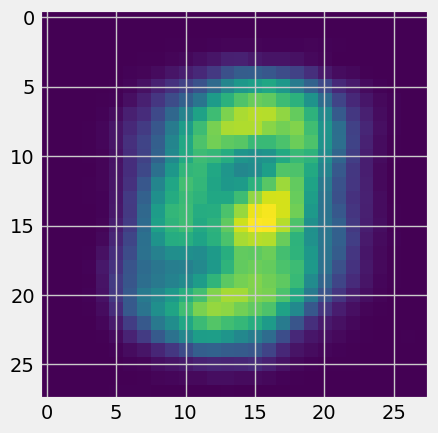

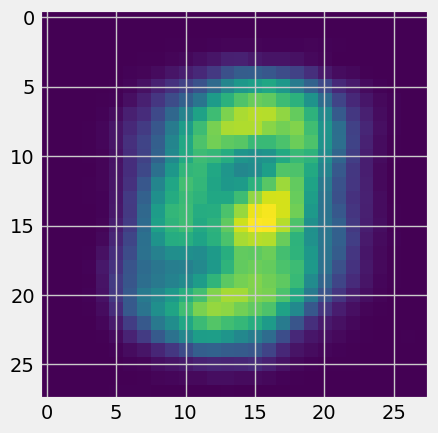

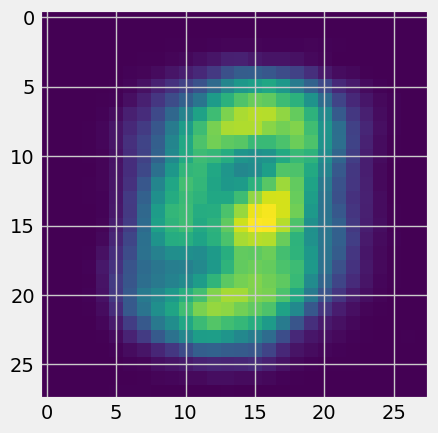

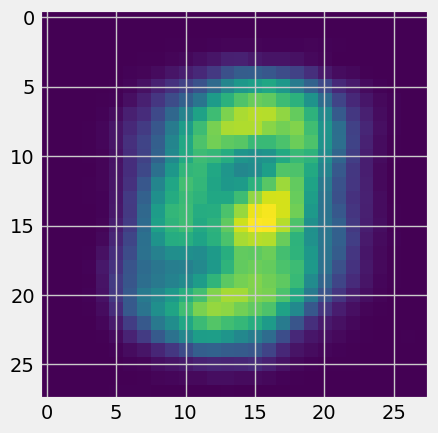

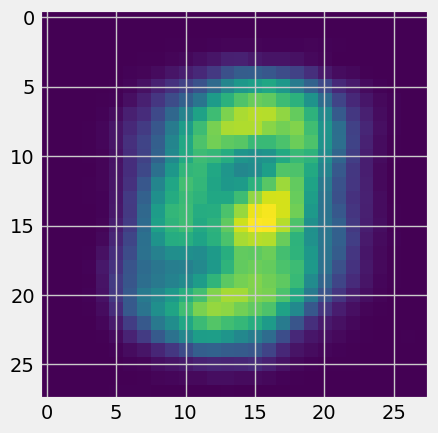

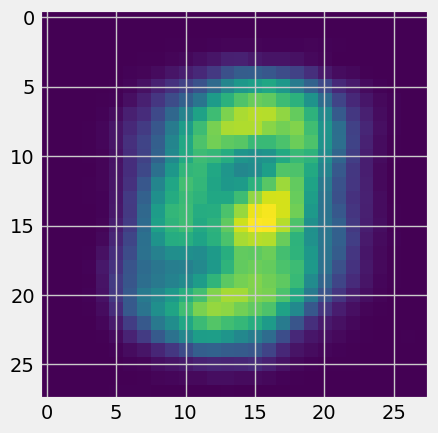

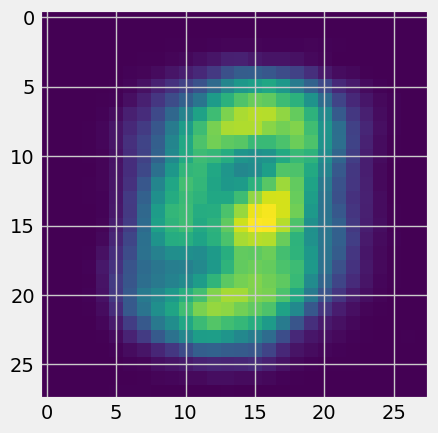

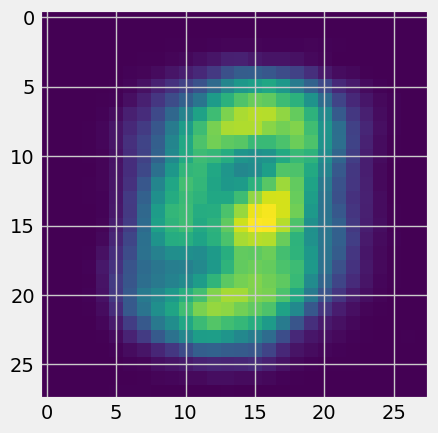

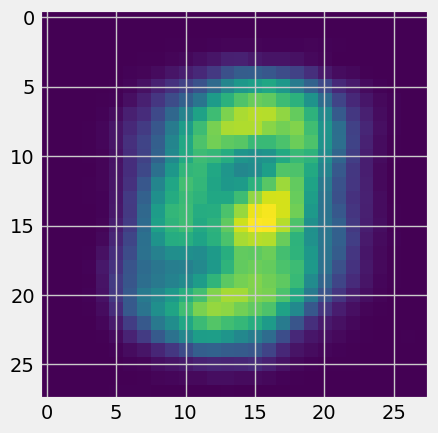

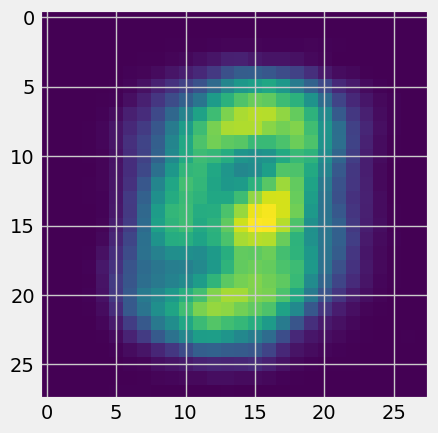

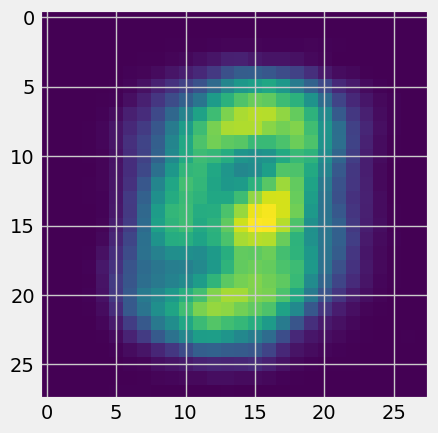

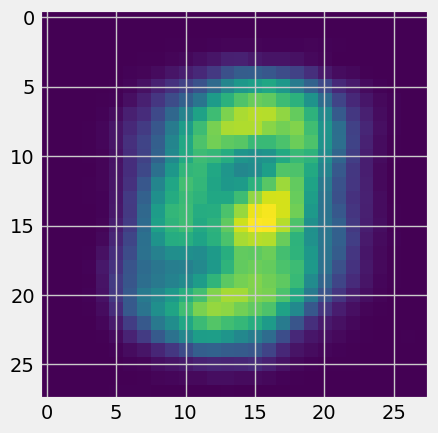

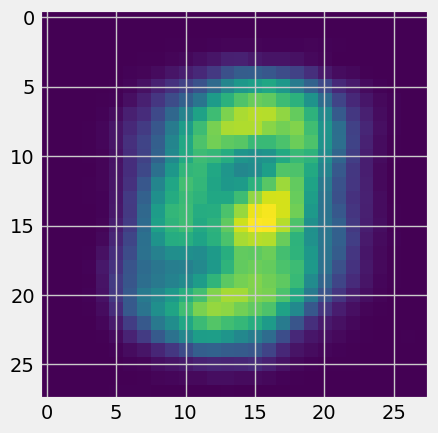

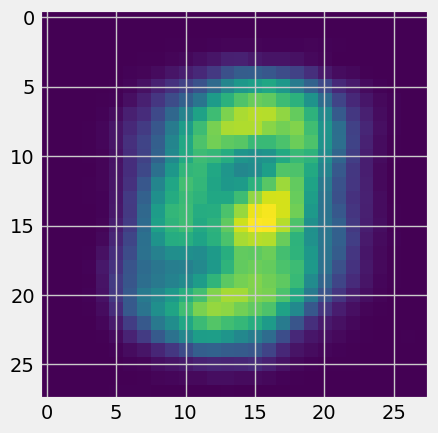

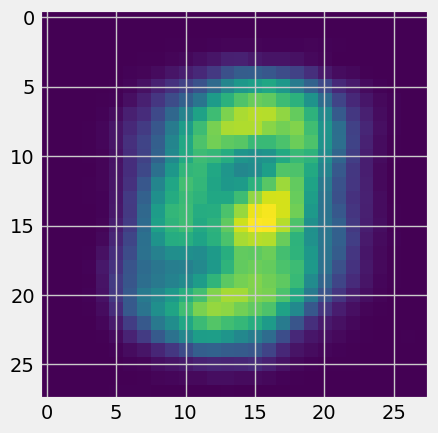

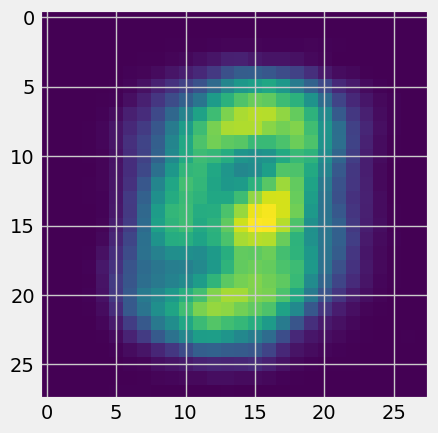

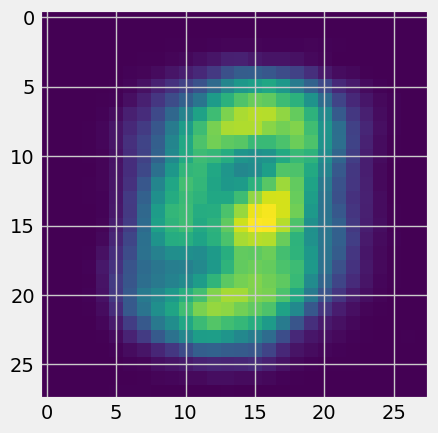

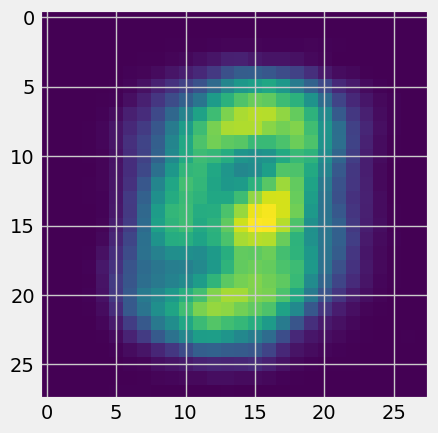

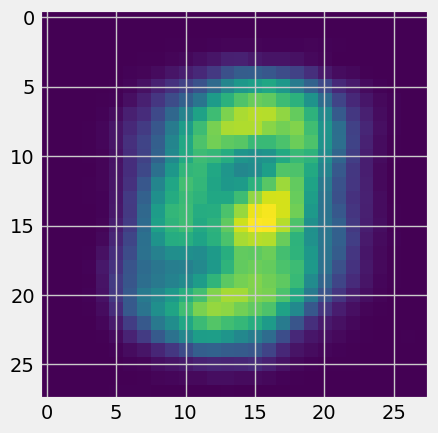

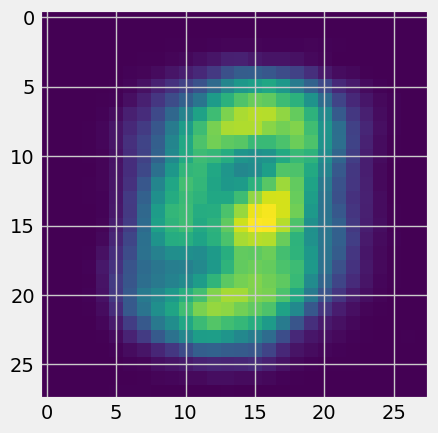

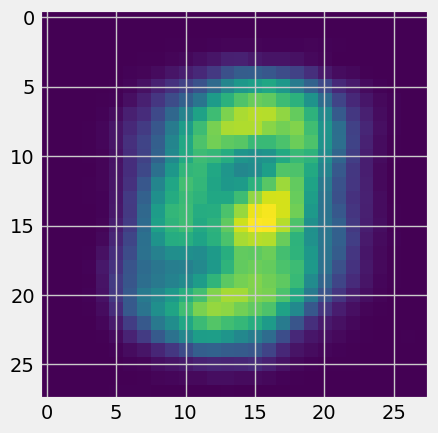

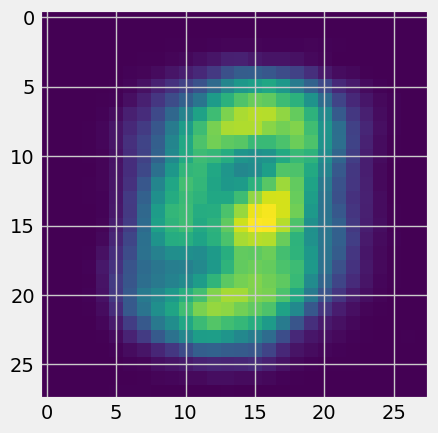

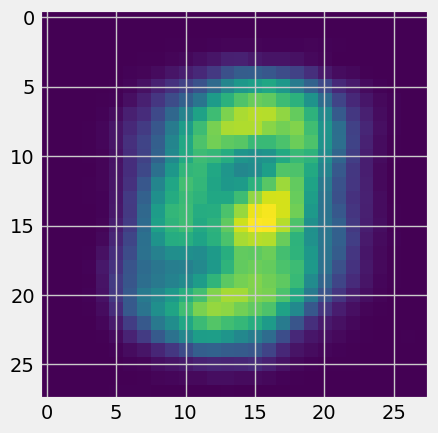

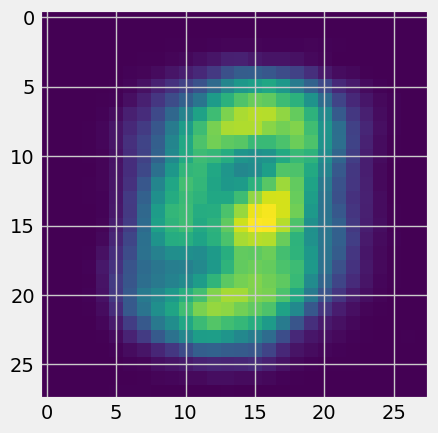

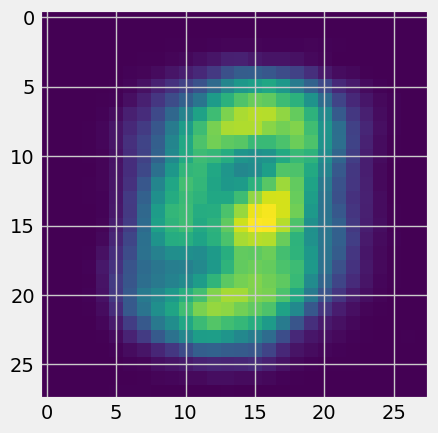

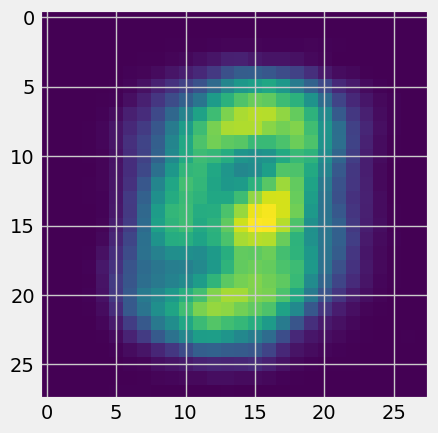

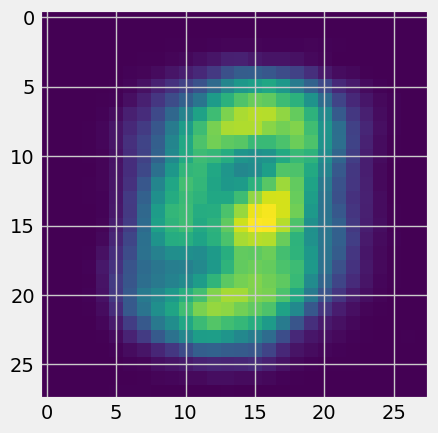

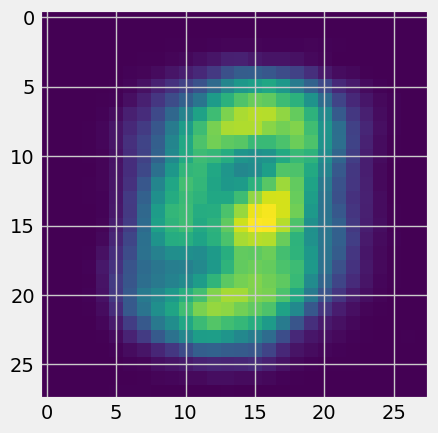

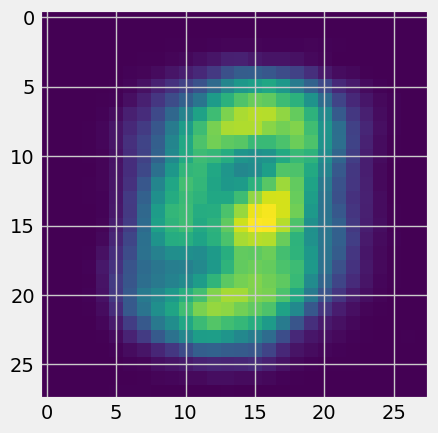

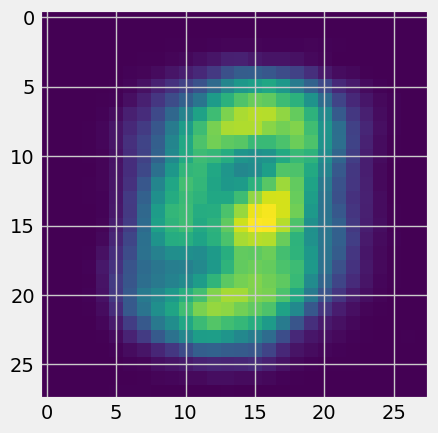

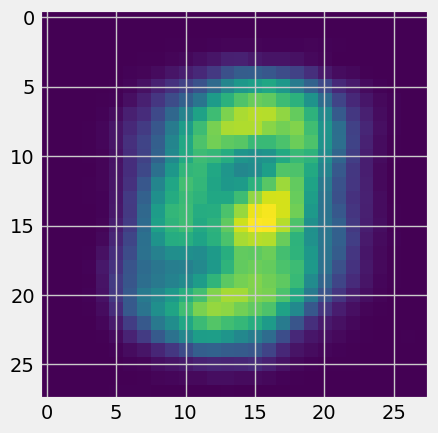

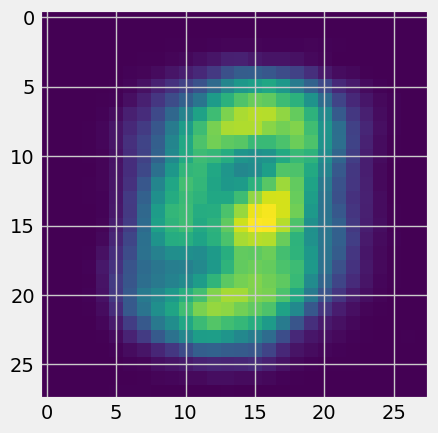

In [16]:
with torch.no_grad():
  for i, item in enumerate(reconstruct):
      # Reshape the array for plotting
      item = item.reshape(-1, 28, 28)
      item = item.cpu()
      plt.imshow(item[0])
      plt.show()